# Chapter 3. 신경망

### 3.1 퍼셉트론에서 신경망으로
- 신경망 vs. 퍼셉트론

#### 3.1.1 신경망의 예
- 구성: 입력층(Input layer) - 은닉층(Hidden layer) - 출력층(Output layer)
- `은닉층`의 뉴런은 사람 눈에 보이지 않음
- `가중치`를 가지는 층은 0층(입력층), 1층(은닉층) $rightarrow$ `2층 신경망`이라 부를 수 있음 (문헌에 따라 다를 수 있음)

#### 3.1.2 퍼셉트론 복습
- ${x_1, x_2}$: 입력 신호
- ${y}$: 출력 신호
- $b$: `편향`을 나타내는 매개변수, 뉴런이 얼마나 쉽게 활성화되느냐를 제어 
- ${w_1, w_2}$: 가중치(weight), 각 신호의 영향력을 제어
- 뉴런에서 보내온 신호의 총합이 정해진 한계(${\theta}$,Threshold, 임계값)을 넘어설 때만 1을 출력

$${y =\begin{cases}0 \ (b \ + \ w_1x_1 \ + \ w_2x_2 \ \leq \ \theta) \\ 1 \ (b \ + \ w_1x_1 \ + \ w_2x_2 \ > \ \theta )\end{cases}}$$

- 위 식을 더 간결하게 바꿔보자
- 조건 분기의 동작(0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)
- 이 함수를 $h(x)$라면 위 식을 아래와 같이 표현할 수 있음

$$y = h(b + w_1x_1 + w_2x_2)$$
- 입력 신호의 총합이 $h(x)$라는 함수를 거쳐 변환, 그 변환된 값이 $y$의 출력이 됨을 표현
</br></br>
$${h(x) =\begin{cases}0 \ (x \ \leq \ 0) \\ 1 \ (x \ > \ 0)\end{cases}}$$
- $h(x)$ 함수는 입력이 0을 넘으면 1을 돌려주고, 그렇지 않으면 0을 돌려줌

#### 3.1.3 활성화 함수의 등장
- $h(x)$: 입력 신호의 총합을 출력 신호로 변환하는 함수 `활성화 함수(Activate function)`
- 수식 표현
$$a = b + w_1x_1 + w_2x_2$$ 
$$ y = h(a)$$

- 가중치가 달린 입력 신호와 편향의 총합을 계산하여 이를 $a$라고 함
- a를 함수에 $h()$에 넣어 $y$를 출력₩

### 3.2 활성화 함수
- 계단 함수(step function): 임계값을 경계로 출력이 바뀌는 활성화 함수(activate function)
    + `perceptron`에서는 활성화 함수로 `계단 함수`를 이용한다고 할 수 있음.
    <br/><br/>
- `활성화 함수`를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠!

#### 3.2.1 Sigmoid 함수
$$ h(x) = \frac{1}{1 + exp(-x)}$$
- $exp(x)$는 $e^{-x}$를 뜻함 ($e$는 자연상수로 2.7182...의 값을 가지는 실수)
- 신경망에서는 활성화 함수로 시그모이드 함수를 이용해 `신호를 변환` $rightarrow$ 변환된 신호를 다음 뉴런에 전달

#### 3.2.2 계단 함수 구현하기
- 계딴 함수는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수

In [27]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- 인수 $x$는 실수(부동소수점)만 받아들임
- `numpy 배열을 지원`하도록 구현해보자

In [28]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [29]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x
y = x > 0 # Numpy 배열에 부등호 연산을 수행 -> 원소 각각에 부등호 연산을 수행한 bool 배열이 생성 -> astype
print(y)
y = y.astype(np.int32) # Numpy 자료형 변환 = 'astype()' 메서드
print(y)

[False  True  True]
[0 1 1]


#### 3.2.3 계단 함수의 그래프

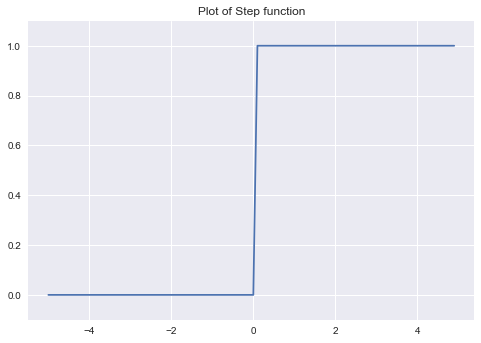

In [35]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.style.use("seaborn")
plt.title("Plot of Step function")
plt.show()

#### 3.2.4 Sigmoid function implementation

- Sigmoid의 뜻: `S자 모양`

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

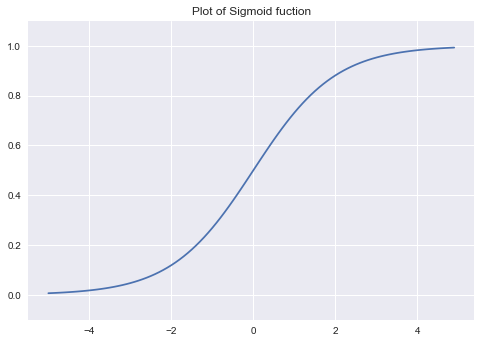

In [33]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.style.use("seaborn")
plt.title("Plot of Sigmoid fuction")
plt.show()

#### 3.2.5 Sigmoid function vs. Step function
||Sigmoid function|Step function|Remark|
|:----:|:----:|:----:|:----:|
|형태|부드러운 곡선|0을 경계로 급진적 변화||
|Output|실수|0 or 1|NN. vs. Perceptron|
|출력 범위|[0, 1]|[0, 1]||
- 공통점: 입력이 중요하면 큰 값을 출력, 입력이 중요하지 않으면 작은 값을 출력

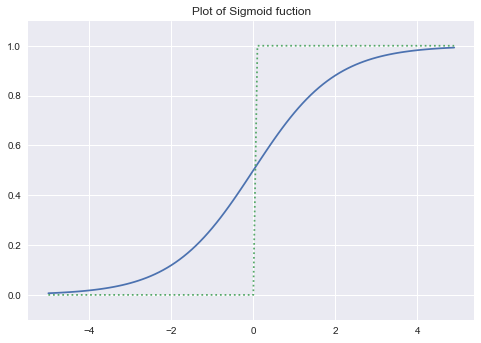

In [34]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y1)
plt.plot(x, y2, ls=":")
plt.ylim(-0.1, 1.1)
plt.style.use("seaborn")
plt.title("Plot of Sigmoid fuction")
plt.show()

#### 3.2.6 비선형 함수
- 계단 함수, 시그모이드 함수 모두 `비선형 함수`(= 직선이 아니다)
- 신경망 층을 쌓아 효과를 얻기 위해서는 반드시 `비선형 함수`를 활성화 함수로 사용해야 함!

#### 3.2.7 ReLU function
- Rectified Linear Unit(ReLU)function: 0을 넘으면 입력값을 그대로 출력, 0 이하이면 0을 출력

$$h(x) = \begin{cases} x \ ( x \ > \ 0 ) \\ 0 \ ( x \ \leq \ 0)\end{cases}$$


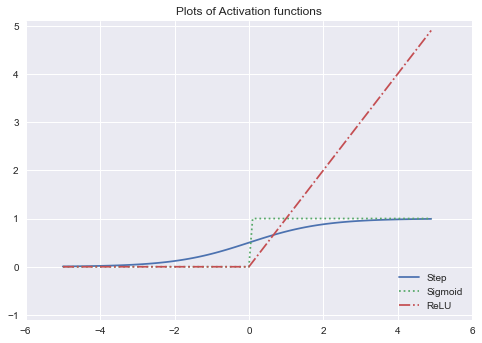

In [46]:
def relu(x):
    return np.maximum(0, x)

y3 = relu(x)
plt.plot(x, y1, label="Step")
plt.plot(x, y2, ls=":", label="Sigmoid")
plt.plot(x, y3, ls="-.", label="ReLU")
plt.xlim(-6., 6.)
plt.ylim(-1.1, 5.1)
plt.style.use("seaborn")
plt.title("Plots of Activation functions")
plt.legend(loc="lower right")
plt.show()

### 3.3 다차원 배열의 계산
- Numpy의 다차원 배열을 사용한 계산법 숙달 $rightarrow$ 신경망의 효율적 구현 가능

#### 3.3.1 다차원 배열
- 다차원 배열의 기본 `숫자의 집합`

- 1차원 배열 샘플

In [2]:
import numpy as np
A = np.array([1, 2, 3, 4])
np.ndim(A)


print(A)
print(np.ndim(A))
A.shape
A.shape[0]

[1 2 3 4]
1


4